In [1]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# Acquire

In [2]:
#reading the list of videos contained in the csv file
df = pd.read_csv('vidz.csv')
#df.head()

In [3]:
#reading the list of country videos contained in the csv files
ca = pd.read_csv('22.31.10_CA_videos.csv')
de = pd.read_csv('22.31.10_DE_videos.csv')
fr = pd.read_csv('22.31.10_FR_videos.csv')
gb = pd.read_csv('22.31.10_GB_videos.csv')
ind = pd.read_csv('22.31.10_IN_videos.csv')
jp = pd.read_csv('22.31.10_JP_videos.csv')
kr = pd.read_csv('22.31.10_KR_videos.csv')
mx = pd.read_csv('22.31.10_MX_videos.csv')
ru = pd.read_csv('22.31.10_RU_videos.csv')
us=pd.read_csv('youtube_us.csv')

In [4]:
df = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, us])

In [5]:
df['rank'] = df.index + 1

In [6]:
#drop columns with redundant information
#df = df.drop(columns=['comments_disabled', 'ratings_disabled' ,'thumbnail_link'])

In [7]:
df.categoryId = df.categoryId.astype('object')

In [8]:
# ".info()" shows the types of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 178
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1662 non-null   object
 1   title              1662 non-null   object
 2   publishedAt        1662 non-null   object
 3   channelTitle       1662 non-null   object
 4   categoryId         1662 non-null   object
 5   trending_date      1662 non-null   object
 6   tags               1662 non-null   object
 7   view_count         1662 non-null   object
 8   likes              1662 non-null   object
 9   comment_count      1662 non-null   object
 10  thumbnail_link     1662 non-null   object
 11  comments_disabled  1662 non-null   object
 12  ratings_disabled   1662 non-null   object
 13  description        1634 non-null   object
 14  duration           1662 non-null   object
 15  captions           1662 non-null   object
 16  rank               1662 non-null   int64 
d

In [9]:
df.isnull().sum()

video_id              0
title                 0
publishedAt           0
channelTitle          0
categoryId            0
trending_date         0
tags                  0
view_count            0
likes                 0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description          28
duration              0
captions              0
rank                  0
dtype: int64

In [10]:
# ".describe()" shows the basic statistical description for each 
#column that is calculable
df.describe()

,rank
count,1662.000000
mean,95.424789
std,56.551480
min,1.000000
25%,47.000000
50%,93.000000
75%,144.000000
max,200.000000


In [11]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'description', 'duration', 'captions', 'rank'],
      dtype='object')

In [12]:
#check data type
df.dtypes

video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId           object
trending_date        object
tags                 object
view_count           object
likes                object
comment_count        object
thumbnail_link       object
comments_disabled    object
ratings_disabled     object
description          object
duration             object
captions             object
rank                  int64
dtype: object

In [13]:
#check 
# ".head" after the data name shows 5 rows of the uploaded dataset
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,rank
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30T21:31:19Z,MMAWeekly.com,17,22.31.10,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,360616,2984,1052,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,PT4M5S,False,1
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30T17:00:21Z,Yes Theory,24,22.31.10,yestheory|seek discomfort|yes theory strangers...,1179634,53966,3319,https://i.ytimg.com/vi/d2Dw-PuNZSE/default.jpg,False,False,Start your free trial with Shopify at this lin...,PT19M41S,False,2
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31T06:10:01Z,SteveDangle,17,22.31.10,Hockey|NHL|Steve Dangle|Toronto Maple Leafs|Ma...,93314,7342,1959,https://i.ytimg.com/vi/nUDTWLfrUsg/default.jpg,False,False,Steve Dangle recaps and analyzes Game 10 of th...,PT18M54S,True,3
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30T17:59:03Z,Magic: The Gathering,20,22.31.10,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9662904,9150,1022,https://i.ytimg.com/vi/L2DGv2bmsqo/default.jpg,False,False,Phyrexians have taken root in Dominaria as a s...,PT3M24S,True,4
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30T21:30:06Z,ChrisMD,24,22.31.10,[none],1268775,86805,1229,https://i.ytimg.com/vi/MIHPNoRJ1p0/default.jpg,False,False,Wowie!Save money whilst shopping online by dow...,PT21M36S,False,5


## Prepare

## Convert to datetime --> ppublised at, trending date, duration (timedelta)

In [14]:
#convert publishedAT to datetime column
df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
df.publishedAt

0     2022-10-30 21:31:19+00:00
1     2022-10-30 17:00:21+00:00
2     2022-10-31 06:10:01+00:00
3     2022-10-30 17:59:03+00:00
4     2022-10-30 21:30:06+00:00
                 ...           
174   2022-10-27 17:18:52+00:00
175   2022-10-28 12:00:28+00:00
176   2022-10-28 13:42:32+00:00
177   2022-10-29 15:00:14+00:00
178   2022-10-29 16:59:25+00:00
Name: publishedAt, Length: 1662, dtype: datetime64[ns, UTC]

In [15]:
#set date to next day in order to capture videos released at different times in different time zones
df.trending_date = '22.28.10'

In [16]:
#convert trending to datetime column
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
df.trending_date

0     2022-10-28 00:00:00+00:00
1     2022-10-28 00:00:00+00:00
2     2022-10-28 00:00:00+00:00
3     2022-10-28 00:00:00+00:00
4     2022-10-28 00:00:00+00:00
                 ...           
174   2022-10-28 00:00:00+00:00
175   2022-10-28 00:00:00+00:00
176   2022-10-28 00:00:00+00:00
177   2022-10-28 00:00:00+00:00
178   2022-10-28 00:00:00+00:00
Name: trending_date, Length: 1662, dtype: datetime64[ns, UTC]

In [17]:
#import tzinfo inorder to strip time zone information from published at. 
#this makes it a "naive" datetime object. may want to change this approach
# from datetime import tzinfo

# df.loc[1,'publishedAt'].replace(tzinfo=None)
#strips the timezone from each row
# for n in range(0,200):
#     df.loc[n,'publishedAt']= df.loc[n,'publishedAt'].replace(tzinfo=None)
# df.loc[10, ['publishedAt']]

In [18]:
#create age column. may want to give timezone info to trending date instead of removing it from pblishedAt
df['age']=(df.trending_date - df.publishedAt)

In [19]:
df.age.sort_values().head(10)

13   -4 days +11:59:20
52   -4 days +12:59:28
31   -4 days +12:59:35
17   -4 days +12:59:44
13   -4 days +12:59:51
49   -4 days +12:59:58
10   -4 days +13:14:05
3    -4 days +13:39:53
22   -4 days +13:59:24
7    -4 days +14:17:13
Name: age, dtype: timedelta64[ns]

## View:Like ratio that can score the video | view:comment ratio

Have them all as a weighted ratio

df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [20]:
#creates engagement metric. not sure how to do weightd columns really
#df['engagement'] = (df.view_count - df.likes) + (df.likes * 2) + (df.comment_count * 4) 
df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [21]:
df.engagement

0      0.019944
1      0.057002
2      0.162655
3       0.00137
4      0.072291
         ...   
174    0.119709
175    0.049777
176    0.007918
177    0.029547
178    0.068201
Name: engagement, Length: 1662, dtype: object

In [22]:
#countes number of tags given to video BEFORE stripping out extraneous things
df['num_of_tags'] = df.tags.str.split('|').str.len()

In [23]:
#gets rid of separator
df.tags = df.tags.str.replace('|'," ")

/var/folders/yy/vlb31b750w74n1jkdd8391tw0000gn/T/ipykernel_86083/1604276903.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.tags = df.tags.str.replace('|'," ")


In [24]:
#Imports spacy
import spacy

In [25]:
#creates the nlp object that is going to do the heavy lifting
nlp = spacy.load("en_core_web_sm")

In [26]:
#uses the nlp object to convert the input text into a doc
#doc = nlp(df.loc[0].tags)

In [27]:
#goes through tokens (words) in each doc
#for token in doc:
    # Get the token text, part-of-speech tag and dependency label
#    token_text = token.text
#    token_pos = token.pos_
#    token_dep = token.dep_
    # This is for formatting only
#    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

# Iterate over the predicted entities
#for ent in doc.ents:
    # Print the entity text and its label
#    print(ent.text, ent.label_)

In [28]:
#creates set of unique words in doc 
#tokens = set()
#for token in doc:
#    tokens.add(token.text)
#print(tokens)

## Think about combining the countries top 25 lists and control for duplicates. 
* This way we can classify what videos have been a top 25 video 


## We can target placing videos in/out of the top 25 


In [29]:
#create rank and top 25 categories

In [30]:
df['rank'] = df.index + 1

In [31]:
df['top_25'] = np.where(df['rank'] < 26, 1, 0)

In [32]:
df.top_25

0      1
1      1
2      1
3      1
4      1
      ..
174    0
175    0
176    0
177    0
178    0
Name: top_25, Length: 1662, dtype: int64

## Convert Duration

In [33]:
df.duration.head(20)

0         PT4M5S
1       PT19M41S
2       PT18M54S
3        PT3M24S
4       PT21M36S
5       PT34M31S
6        PT3M52S
7       PT19M58S
8        PT3M19S
9         PT4M7S
10      PT23M21S
11      PT16M42S
12      PT37M29S
13      PT21M30S
14      PT38M21S
15       PT2M56S
16       PT38M9S
17      PT26M28S
18    PT11H5M38S
19      PT19M19S
Name: duration, dtype: object

In [34]:
testy = 'PT3M45S'

In [35]:
testy.__contains__('M')

True

In [36]:
def clean_duration(duration):
    print(duration)
    if ('S' not in duration) & ('M' not in duration):
        duration += '00M00S'
    elif 'M' not in duration:
        duration = list(duration)
        duration.insert(-3, '00M')
        duration = ''.join(duration)
    elif 'S' not in duration:
        duration += '00S'
    
    if 'H' in duration:
        duration = int(testy.split('H')[0].split('T')[1]) * 3600 + int(duration.split('H')[1].split('M')[0]) * 60 + int(duration.split('M')[1][:-1])
    elif duration.__contains__('M'):
        duration = int(duration.split('M')[0].split('T')[1]) * 60 + int(duration.split('M')[1][:-1])
    else:
        duration = int(duration[-3:-1])

    return duration

In [37]:
#df['duration'] = df['duration'].apply(lambda x:clean_duration(x))

In [38]:
#making categorid into actual category titles
#all categoryId optain from youtube website
df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                   ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                   22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                   26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                   29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                   33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                   39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})

In [39]:
df['duration']

0          PT4M5S
1        PT19M41S
2        PT18M54S
3         PT3M24S
4        PT21M36S
          ...    
174       PT16M6S
175      PT29M58S
176      PT12M18S
177         PT59S
178    PT2H37M51S
Name: duration, Length: 1662, dtype: object

In [40]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,comments_disabled,ratings_disabled,description,duration,captions,rank,age,engagement,num_of_tags,top_25
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-28 00:00:00+00:00,MMA mixed martial arts MMAWeekly.com MMAWeekly...,360616,2984,1052,...,False,False,See the highlights from Jake Paul vs Anderson ...,PT4M5S,False,1,-3 days +02:28:41,0.019944,17,1
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30 17:00:21+00:00,Yes Theory,Entertainment,2022-10-28 00:00:00+00:00,yestheory seek discomfort yes theory strangers...,1179634,53966,3319,...,False,False,Start your free trial with Shopify at this lin...,PT19M41S,False,2,-3 days +06:59:39,0.057002,7,1
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31 06:10:01+00:00,SteveDangle,Sports,2022-10-28 00:00:00+00:00,Hockey NHL Steve Dangle Toronto Maple Leafs Ma...,93314,7342,1959,...,False,False,Steve Dangle recaps and analyzes Game 10 of th...,PT18M54S,True,3,-4 days +17:49:59,0.162655,26,1
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-28 00:00:00+00:00,magic mtg wizards wotc planeswalkers tcg tradi...,9662904,9150,1022,...,False,False,Phyrexians have taken root in Dominaria as a s...,PT3M24S,True,4,-3 days +06:00:57,0.00137,13,1
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30 21:30:06+00:00,ChrisMD,Entertainment,2022-10-28 00:00:00+00:00,[none],1268775,86805,1229,...,False,False,Wowie!Save money whilst shopping online by dow...,PT21M36S,False,5,-3 days +02:29:54,0.072291,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 178
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           1662 non-null   object             
 1   title              1662 non-null   object             
 2   publishedAt        1662 non-null   datetime64[ns, UTC]
 3   channelTitle       1662 non-null   object             
 4   categoryId         1662 non-null   object             
 5   trending_date      1662 non-null   datetime64[ns, UTC]
 6   tags               1662 non-null   object             
 7   view_count         1662 non-null   object             
 8   likes              1662 non-null   object             
 9   comment_count      1662 non-null   object             
 10  thumbnail_link     1662 non-null   object             
 11  comments_disabled  1662 non-null   object             
 12  ratings_disabled   1662 non-null   object        

In [42]:
df.isna().sum()

video_id              0
title                 0
publishedAt           0
channelTitle          0
categoryId            0
trending_date         0
tags                  0
view_count            0
likes                 0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description          28
duration              0
captions              0
rank                  0
age                   0
engagement            0
num_of_tags           0
top_25                0
dtype: int64

In [43]:
#Remove NA Values
df.dropna(inplace = True)

In [44]:
df.isna().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
duration             0
captions             0
rank                 0
age                  0
engagement           0
num_of_tags          0
top_25               0
dtype: int64

# Exploration

In [45]:
def prepare_youtube(df):
    df.categoryId = df.categoryId.astype('object')
    df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
    df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
    df.trending_date = '22.31.10'
    df['age']=(df.trending_date - df.publishedAt)
    df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count
    df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
    df['duration'] = df['duration'].apply(lambda x:clean_duration(x))
    #making categorid into actual category titles
    #all categoryId optain from youtube website
    df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                       ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                       22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                       26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                       29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                       33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                       39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})
    return df

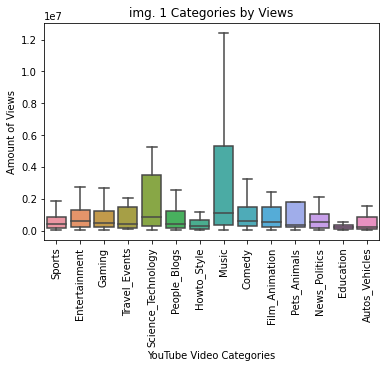

In [46]:
#This sets the box plot by the axes and dataframe :
sns.boxplot(x="categoryId", y="view_count", data= df, showfliers=False) .set(title="img. 1 Categories by Views") 
plt.xlabel("YouTube Video Categories")                 
plt.ylabel("Amount of Views")
plt.xticks(rotation= 90)
plt.show()

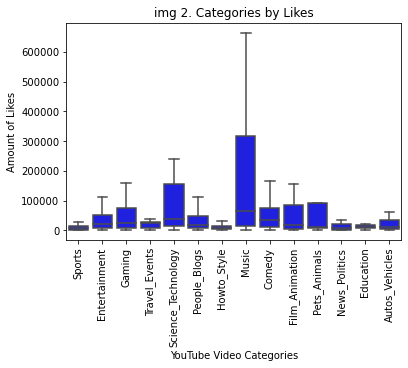

In [47]:
#Create a box plot showing the amount of likes for each category of videos
sns.boxplot(x="categoryId", y="likes", data= df, showfliers=False, color="blue") .set(title="img 2. Categories by Likes") 
plt.xlabel("YouTube Video Categories")              
plt.ylabel("Amount of Likes")
plt.xticks(rotation= 90)
plt.show()

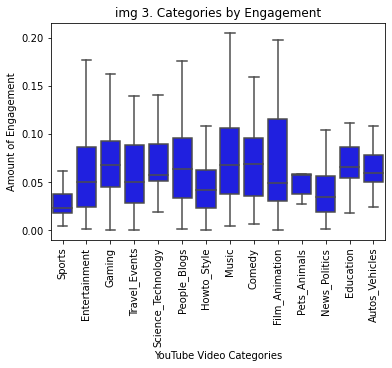

In [48]:
#Create a box plot showing the amount of dislikes for each category of videos
sns.boxplot(x="categoryId", y="engagement", data= df, showfliers=False, color="blue") .set(title="img 3. Categories by Engagement") 
plt.xlabel("YouTube Video Categories")                
plt.ylabel("Amount of Engagement")
plt.xticks(rotation= 90)
plt.show()

In [49]:
#sns.lineplot( data= yt, x="category_name", y="trending_date",hue="categoryId").set(title="Youtube Videos Categories") #THis sets the histogram by the axes and dataframe
#sns.lineplot(data= df, x="trending_date", y="view_count",hue="categoryId").set(title=" img 4. Youtube Videos Categories Trending date")
#plt.xlabel("Trending Date")                 
#plt.ylabel("Views")
#plt.show()

In [50]:
#Create a box plot showing the amount of sponsored for each category of videos
#sns.boxplot(x="categoryId", y="sponsored", data= df, showfliers=False, color="blue") .set(title="img 5. Categories by Sponsored") 
#plt.xlabel("YouTube Video Categories")                
#plt.ylabel("Amount of Sponsored")
#plt.xticks(rotation= 90)
#plt.show()

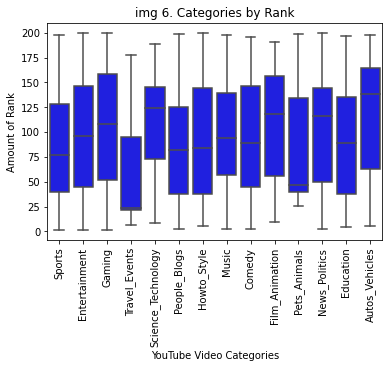

In [51]:
#Create a box plot showing the amount of sponsored for each category of videos
sns.boxplot(x="categoryId", y="rank", data= df, showfliers=False, color="blue") .set(title="img 6. Categories by Rank") 
plt.xlabel("YouTube Video Categories")                
plt.ylabel("Amount of Rank")
plt.xticks(rotation= 90)
plt.show()

In [52]:
#Create a box plot showing the amount of sponsored for each category of videos
#sns.boxplot(x="categoryId", y="duration", data= df, showfliers=False, color="blue") .set(title="img 7. Categories by Duration") 
#plt.xlabel("YouTube Video Categories")                
#plt.ylabel("Amount of Duration")
#plt.xticks(rotation= 90)
#plt.show()

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#from textblob import TextBlob
from plotly.offline import iplot
#import emoji
import re
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns

In [54]:
polarity=[]

for com in df['comment_count']:
    try:
        polarity.append(TextBlob(com).sentiment.polarity)
    except:
        polarity.append(0)
        
df['polarity'] = polarity
df.head(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,ratings_disabled,description,duration,captions,rank,age,engagement,num_of_tags,top_25,polarity
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-28 00:00:00+00:00,MMA mixed martial arts MMAWeekly.com MMAWeekly...,360616,2984,1052,...,False,See the highlights from Jake Paul vs Anderson ...,PT4M5S,False,1,-3 days +02:28:41,0.019944,17,1,0
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30 17:00:21+00:00,Yes Theory,Entertainment,2022-10-28 00:00:00+00:00,yestheory seek discomfort yes theory strangers...,1179634,53966,3319,...,False,Start your free trial with Shopify at this lin...,PT19M41S,False,2,-3 days +06:59:39,0.057002,7,1,0
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31 06:10:01+00:00,SteveDangle,Sports,2022-10-28 00:00:00+00:00,Hockey NHL Steve Dangle Toronto Maple Leafs Ma...,93314,7342,1959,...,False,Steve Dangle recaps and analyzes Game 10 of th...,PT18M54S,True,3,-4 days +17:49:59,0.162655,26,1,0
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-28 00:00:00+00:00,magic mtg wizards wotc planeswalkers tcg tradi...,9662904,9150,1022,...,False,Phyrexians have taken root in Dominaria as a s...,PT3M24S,True,4,-3 days +06:00:57,0.00137,13,1,0
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30 21:30:06+00:00,ChrisMD,Entertainment,2022-10-28 00:00:00+00:00,[none],1268775,86805,1229,...,False,Wowie!Save money whilst shopping online by dow...,PT21M36S,False,5,-3 days +02:29:54,0.072291,1,1,0
5,HlkORTHy8DU,Big Changes Coming (channel update),2022-10-30 15:00:08+00:00,Eamon & Bec,Travel_Events,2022-10-28 00:00:00+00:00,van life living in a van vanlife eamon and bec...,407182,25492,7843,...,False,Shop our limited edition Breast Cancer Awarene...,PT34M31S,False,6,-3 days +08:59:52,0.139653,15,1,0
6,sOY9p5gFa5Q,Ross Chastain's video game move to advance to ...,2022-10-30 21:52:01+00:00,NASCAR,Sports,2022-10-28 00:00:00+00:00,[none],420846,6745,1246,...,False,Watch Ross Chastain's video-game-style move to...,PT3M52S,False,7,-3 days +02:07:59,0.02787,1,1,0
7,7j1lMs7fcIQ,Everything About Irrigation Pivots (Farmers ar...,2022-10-30 21:39:23+00:00,SmarterEveryDay,Science_Technology,2022-10-28 00:00:00+00:00,Smarter Every Day Science Physics Destin Sandl...,509217,36606,2221,...,False,I want to send you stickers via Patreon: https...,PT19M58S,False,8,-3 days +02:20:37,0.089333,41,1,0
8,fCMa_F8E7-g,Jake Paul After Beating Anderson Silva: I Want...,2022-10-30 05:35:43+00:00,SHOWTIME Sports,Sports,2022-10-28 00:00:00+00:00,showtime shosports sports Floyd Mayweather Log...,692325,11658,4828,...,False,"After beating Anderson Silva on SHOWTIME PPV, ...",PT3M19S,False,9,-3 days +18:24:17,0.044733,30,1,0
9,nLygs0-RpWk,Young Magician AMAZES the Judges and Crowd | A...,2022-10-30 09:27:26+00:00,Australia's Got Talent,Entertainment,2022-10-28 00:00:00+00:00,australias got talent agt australia's got tale...,166537,0,76,...,True,Magic Macy auditions for #AGT 2022! Find #AGTo...,PT4M7S,False,10,-3 days +14:32:34,0.001825,12,1,0


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [56]:
def basic_clean(article0):
    #lower cases
    if isinstance(article0, float):
        article = str(article0).lower()
    else:
        article = article0.lower()
    ## decodes to change to "normal" characters after encoding to ascii from a unicode normalize
    article = unicodedata.normalize("NFKD",article).encode("ascii","ignore").decode("utf-8")
    # removes anything not lowercase, number, single quote, or a space
    article = re.sub(r'[^a-z0-9\'\s]','',article)
    return article

In [57]:
def tokenize(article0):
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    article = tokenize.tokenize(article0,return_str=True)
    return article


In [58]:
def stem(article):
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in article.split()]
    #join words back together
    article_stemmed = " ".join(stems)
    return article_stemmed

In [59]:
def lemmatize(article):
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    #use lemmatizer
    lemmatized = [wnl.lemmatize(word) for word in article.split()]
    #join words back together
    article_lemmatized = " ".join(lemmatized)
    return article_lemmatized

In [60]:
def remove_stopwords(article_processed,words_to_add=[],words_to_remove=[]):
    #save stopword 
    stopwords_list = stopwords.words("english")
    #modify stopword list
    [stopwords_list.append(word) for word in words_to_add]
    [stopwords_list.remove(word) for word in words_to_remove]
    #remove using stopword list
    words = article_processed.split()
    filtered_words = [w for w in words if w not in stopwords_list]
    #join words back together
    article_without_stopwords = " ".join(filtered_words)
    return article_without_stopwords


In [61]:
# cleaning the data for world cloud
df = df[df.description.isna()==False]
df["clean"] = [remove_stopwords(tokenize(basic_clean(each))) for each in df.description]
df["stemmed"] = df.clean.apply(stem)
df["lemmatized"] = df.clean.apply(lemmatize)

In [62]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,captions,rank,age,engagement,num_of_tags,top_25,polarity,clean,stemmed,lemmatized
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-28 00:00:00+00:00,MMA mixed martial arts MMAWeekly.com MMAWeekly...,360616,2984,1052,...,False,1,-3 days +02:28:41,0.019944,17,1,0,see highlights jake paul vs anderson silva hig...,see highlight jake paul vs anderson silva high...,see highlight jake paul v anderson silva highl...
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30 17:00:21+00:00,Yes Theory,Entertainment,2022-10-28 00:00:00+00:00,yestheory seek discomfort yes theory strangers...,1179634,53966,3319,...,False,2,-3 days +06:59:39,0.057002,7,1,0,start free trial shopify link httpshopifycomye...,start free trial shopifi link httpshopifycomye...,start free trial shopify link httpshopifycomye...
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31 06:10:01+00:00,SteveDangle,Sports,2022-10-28 00:00:00+00:00,Hockey NHL Steve Dangle Toronto Maple Leafs Ma...,93314,7342,1959,...,True,3,-4 days +17:49:59,0.162655,26,1,0,steve dangle recaps analyzes game 10 toronto m...,steve dangl recap analyz game 10 toronto mapl ...,steve dangle recap analyzes game 10 toronto ma...
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-28 00:00:00+00:00,magic mtg wizards wotc planeswalkers tcg tradi...,9662904,9150,1022,...,True,4,-3 days +06:00:57,0.00137,13,1,0,phyrexians taken root dominaria shocking sleep...,phyrexian taken root dominaria shock sleeper a...,phyrexians taken root dominaria shocking sleep...
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30 21:30:06+00:00,ChrisMD,Entertainment,2022-10-28 00:00:00+00:00,[none],1268775,86805,1229,...,False,5,-3 days +02:29:54,0.072291,1,1,0,wowiesave money whilst shopping online downloa...,wowiesav money whilst shop onlin download pouc...,wowiesave money whilst shopping online downloa...


## Bigrams

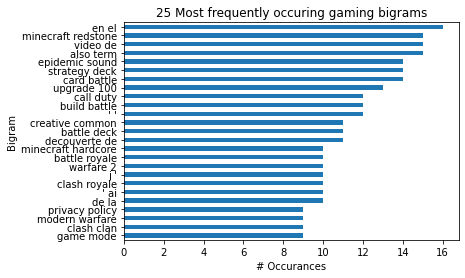

In [63]:
Gaming = ' '.join(df[df.categoryId == 'Gaming'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Gaming, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending = True).plot.barh(), 
plt.title('25 Most frequently occuring gaming bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

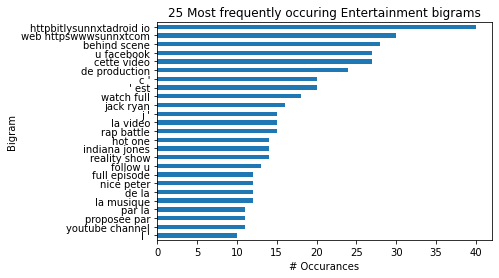

In [64]:
Ruby = ' '.join(df[df.categoryId == 'Entertainment'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending = True).plot.barh(),

plt.title('25 Most frequently occuring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

## Wordcloud

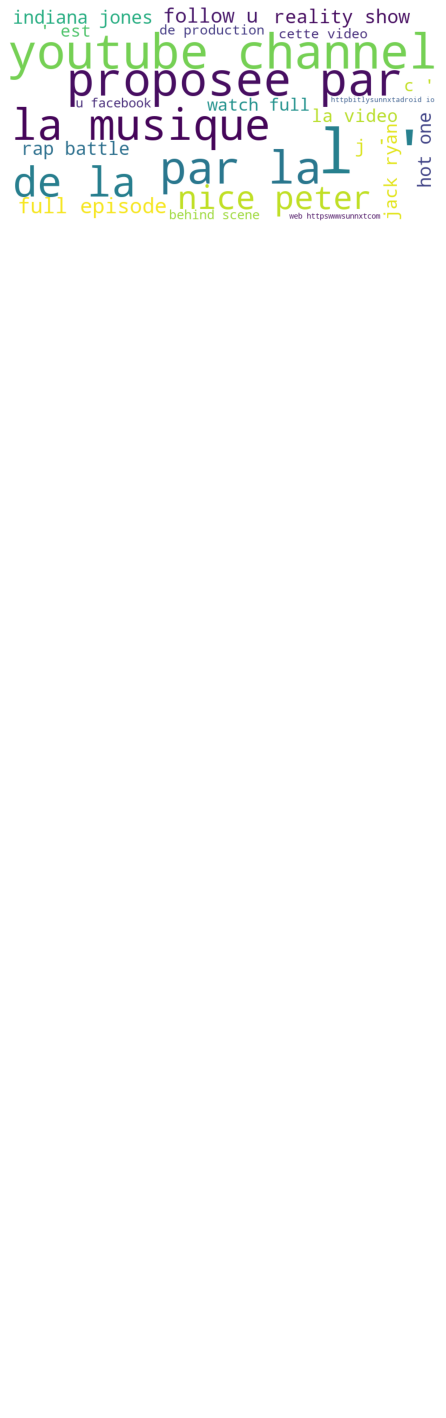

In [65]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

axs = [plt.axes([0, 0, 1, 1]), plt.axes([0, 1, 1, 1]), plt.axes([0, 2, 1, 1])
      , plt.axes([0, 3, 1, 1]), plt.axes([0, 4, 1, 1])]

axs[4].imshow(img)

for ax in axs: ax.axis('off')
plt.show()

In [66]:
df.view_count = df.view_count.astype(float)
df.view_count

0       360616.0
1      1179634.0
2        93314.0
3      9662904.0
4      1268775.0
         ...    
174    1816749.0
175    9514619.0
176     962812.0
177    1578577.0
178      90717.0
Name: view_count, Length: 1634, dtype: float64

<AxesSubplot:ylabel='Frequency'>

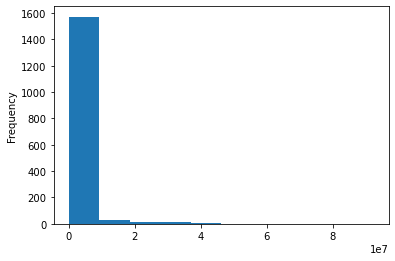

In [67]:
df.view_count.plot.hist()

## Modeling

In [68]:

# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# NLP Imports
import unicodedata
import re
import json
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")


In [69]:
df.lemmatized

0      see highlight jake paul v anderson silva highl...
1      start free trial shopify link httpshopifycomye...
2      steve dangle recap analyzes game 10 toronto ma...
3      phyrexians taken root dominaria shocking sleep...
4      wowiesave money whilst shopping online downloa...
                             ...                        
174    httpsyoutubetgmilzlkh4s httpsedisonfamilyvsema...
175    4 httpsa4shopru telegram httpstmea4omg instagr...
176    really happened blue sad story roblox rainbow ...
177                           intense via woodyandkleiny
178    httpsrrpru httpswwwdonationalertscomrkovalevsk...
Name: lemmatized, Length: 1634, dtype: object

In [70]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.lemmatized)
tfidfs

<1634x36553 sparse matrix of type '<class 'numpy.float64'>'
	with 91736 stored elements in Compressed Sparse Row format>

In [71]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

,00,000,0000,000000,000013,000014,000015,000034,000035,000055,...,zwiebel,zwiebel12,zwiebelsalz,zwischen,zwischendurch,zwischenmenschliche,zwischenzeit,zyada,zyzx,zzzzziiiizzzzzme
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df.lemmatized.str.contains('zxingcppzxingcpphttpsgithubcomzxingcppzxingcpp').sum()

0

In [73]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.top_25

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)

In [74]:
X_test.shape

(327, 36553)

In [75]:
X_validate.shape

(327, 36553)

In [76]:
X_train.shape

(980, 36553)

In [77]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_lm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_lm))

Accuracy: 86.43%
---
Confusion Matrix
actual          0    1
predicted_lm          
0             847  133
---
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       847
           1       0.00      0.00      0.00       133

    accuracy                           0.86       980
   macro avg       0.43      0.50      0.46       980
weighted avg       0.75      0.86      0.80       980



In [78]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_lm, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_lm))

Accuracy: 86.54%
---
Confusion Matrix
actual          0   1
predicted_lm         
0             283  44
---
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       283
           1       0.00      0.00      0.00        44

    accuracy                           0.87       327
   macro avg       0.43      0.50      0.46       327
weighted avg       0.75      0.87      0.80       327



In [79]:
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)

MultinomialNB()

In [80]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)

train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

In [81]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_MNBclf, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_MNBclf))

Accuracy: 86.43%
---
Confusion Matrix
actual              0    1
predicted_MNBclf          
0                 847  133
---
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       847
           1       0.00      0.00      0.00       133

    accuracy                           0.86       980
   macro avg       0.43      0.50      0.46       980
weighted avg       0.75      0.86      0.80       980



In [82]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_MNBclf, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_MNBclf))

Accuracy: 86.54%
---
Confusion Matrix
actual              0   1
predicted_MNBclf         
0                 283  44
---
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       283
           1       0.00      0.00      0.00        44

    accuracy                           0.87       327
   macro avg       0.43      0.50      0.46       327
weighted avg       0.75      0.87      0.80       327



In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

,00,000,0000,000000,000013,000014,000015,000034,000035,000055,...,zwiebel,zwiebel12,zwiebelsalz,zwischen,zwischendurch,zwischenmenschliche,zwischenzeit,zyada,zyzx,zzzzziiiizzzzzme
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)

In [85]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_lm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_lm))

Accuracy: 97.96%
---
Confusion Matrix
actual          0    1
predicted_lm          
0             847   20
1               0  113
---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       847
           1       1.00      0.85      0.92       133

    accuracy                           0.98       980
   macro avg       0.99      0.92      0.95       980
weighted avg       0.98      0.98      0.98       980



In [86]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted_lm, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted_lm))

Accuracy: 84.10%
---
Confusion Matrix
actual          0   1
predicted_lm         
0             272  41
1              11   3
---
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       283
           1       0.21      0.07      0.10        44

    accuracy                           0.84       327
   macro avg       0.54      0.51      0.51       327
weighted avg       0.78      0.84      0.80       327



In [87]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df.lemmatized)
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

,00,00 1028321,00 16,00 wenige,000,000 0135,000 042,000 053,000 108,000 125,...,zwischenmenschliche,zwischenmenschliche konflikte,zwischenzeit,zwischenzeit fur,zyada,zyada der,zyzx,zyzx httpswwwtwitchtvzyzxbluto2u2,zzzzziiiizzzzzme,zzzzziiiizzzzzme suivre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)

In [89]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

AttributeError: 'DataFrame' object has no attribute 'predicted'

In [ ]:
#model imports

from math import sqrt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor


In [ ]:
# this function is splitting data to train, validate, and test to avoid data leakage
def split_data(df):
    '''
    This function performs split on zillow data, stratify assesed value.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123) 
                                            
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123) 
                                    
    return train, validate, test

In [ ]:
#Split data
train_validate, test = train_test_split(df, train_size = 0.2, random_state=123)
train, validate = train_test_split(train_validate, train_size = 0.3, random_state=123)
train.shape, validate.shape, test.shape

# Modeling & Evaluate
## Scaling

In [ ]:
import sklearn.preprocessing

In [ ]:
#Write function to scale data for zillow data
def scale_data(train, validate, test, features_to_scale):
    """Scales the 3 data splits using MinMax Scaler. 
    Takes in train, validate, and test data splits as well as a list of the features to scale. 
    Returns dataframe with scaled counterparts on as columns"""
    
    
    # Make the thing to train data only
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[features_to_scale])
    
    # Fit the thing with new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in features_to_scale]
    
    # Transform the separate datasets using the scaler learned from train
    scaled_train = scaler.transform(train[features_to_scale])
    scaled_validate = scaler.transform(validate[features_to_scale])
    scaled_test = scaler.transform(test[features_to_scale])
    
    # Apply the scaled data to the original unscaled data
    train_scaled = pd.concat([train, pd.DataFrame(scaled_train,index=train.index, columns = scaled_columns)],axis=1)
    validate_scaled = pd.concat([validate, pd.DataFrame(scaled_validate,index=validate.index, columns = scaled_columns)],axis=1)
    test_scaled = pd.concat([test, pd.DataFrame(scaled_test,index=test.index, columns = scaled_columns)],axis=1)

    return train_scaled, validate_scaled, test_scaled

In [ ]:
df.columns

In [ ]:
#features to scale
#features_to_scale = [""]

In [ ]:
#scalled features to train, validate & test
#train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, features_to_scale)